In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Чтение данных

In [66]:
data = pd.read_csv('train.csv')
data.sample(n=5)  # посмотрим на 5 случайных строк

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2052,19,73.85,1424.5,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
4280,2,93.85,196.75,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1850,21,75.30,1570.7,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
728,72,90.45,6565.85,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),0
2358,17,20.75,418.25,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0


In [67]:
# название колонок для числовых и категориальных признаков

# числовые признаки
numerical_columns = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# категориальные признаки
catigorial_columns = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# все признаки
feature_columns = numerical_columns + catigorial_columns

# целевой признак
target_column = 'Churn'

### Удалим все non'ы

Посмотрим есть ли незаполненные признаки (nan'ы)

In [68]:
data = data.replace('?', np.nan)
data = data.replace('', np.nan)
data = data.replace(' ', np.nan)

In [69]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Видно, что есть nun в колонке TotalSpent. Удалим эти строки с nan.

In [70]:
data = data.dropna()
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

# Применение линейных моделей

### Создание pipline

В задании сказано "Для one-hot-encoding'a **можно** испльзовать комбинацию LabelEncoder + OneHotEncoder"

Можно, но не обязательно. Я считаю это излишним, так что использовал только OneHotEncoder.

In [73]:
X = data.drop(columns=target_column)
y = data[target_column]

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# препроцессор, который будет обрабатывать и числовые, и категориальные признаки
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns),  # нормализация числовых значений
    (OneHotEncoder(), catigorial_columns)  # OneHotEncoder для категориальных признаков
)

# основной pipline
pipeline = make_pipeline(
    preprocessor,
    LogisticRegression()
)

pipeline.fit(X, y)
pipeline.score(X, y)

0.8056135027498578

### GridSearchCV

С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [78]:
from sklearn.model_selection import GridSearchCV

In [162]:
# param = {'logisticregression__C': [100000, 10, 0.0001]}
# param = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}
param = {'logisticregression__C': [10000000/10**i for i in range(14)]}

model = GridSearchCV(estimator=pipeline,
                     param_grid=param,
                     cv=10,
                     scoring='roc_auc',
                     n_jobs=-1)
model.fit(X, y)
None

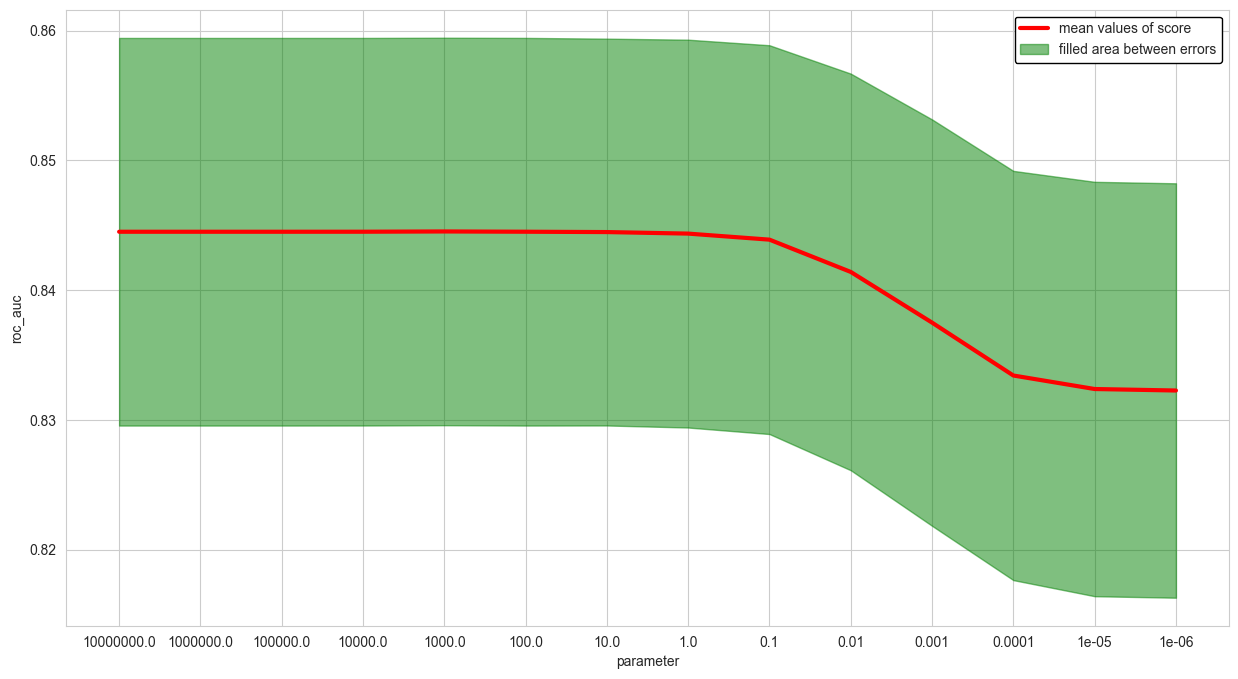

In [164]:
means = model.cv_results_['mean_test_score']
error = model.cv_results_['std_test_score']
grid = list(range(len(means)))
# grid = param['logisticregression__C']

plt.figure(figsize=(15,8))

plt.plot(grid, means, label='mean values of score', color='red', lw=3)
plt.fill_between(grid, means - error, means + error, color='green', label='filled area between errors', alpha=0.5)

plt.xticks(grid, param['logisticregression__C'])

legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.show()

Лучшее значение C:

In [165]:
model.best_params_

{'logisticregression__C': 1000.0}

Запомним лучшую модель

In [166]:
best_model = model.best_estimator_

In [168]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

best_model.predict_proba(X_test)

submission['Churn'] =best_model.predict_proba(X_test)[:, 1] # используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

ValueError: could not convert string to float: ' '